In [1]:
from binpack.models import Result
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
results = Result.objects.filter(n_tiles=20)

In [3]:
results.values('score')

<QuerySet [{'score': 4.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 0.0}, {'score': 5.0}, {'score': 3.0}, '...(remaining elements truncated)...']>

In [29]:
common_args = {'problem_generator': 'florian', 'n_simulations': 1000}
common_args['problem_generator'] = 'guillotine'
if common_args['problem_generator'] == 'guillotine':
    # find same problem instances
    avg_depth_ids = []
    max_depth_ids = []
    for max_depth_res in results.filter(score__isnull=False, strategy='max_depth', **common_args):
        avg_depth_score = results.filter(score__isnull=False, strategy='avg_depth', cols=max_depth_res.cols, rows=max_depth_res.rows, tiles=max_depth_res.tiles, **common_args)
        if avg_depth_score:
            avg_depth_ids.append(avg_depth_score.first().id)
            max_depth_ids.append(max_depth_res.id)
    max_depth_scores = results.filter(id__in=max_depth_ids).values('score')
    avg_depth_scores = results.filter(id__in=avg_depth_ids).values('score')
else:
    avg_depth_scores = results.filter(score__isnull=False, strategy='avg_depth', **common_args).values('score')
    max_depth_scores = results.filter(score__isnull=False, strategy='max_depth', **common_args).values('score')
    
print(avg_depth_scores.count())
print(max_depth_scores.count())
scores = results.values('score', 'strategy')
print(np.average(np.array(results.filter(score__isnull=False, strategy='avg_depth', **common_args).values_list('rows', flat=True))))
print(np.average(np.array(results.filter(score__isnull=False, strategy='max_depth', **common_args).values_list('rows', flat=True))))

4
11
19.0
19.03846153846154


In [30]:
scores_df = pd.DataFrame.from_records(scores)
avg_depth_df = pd.DataFrame.from_records(avg_depth_scores)
def score_to_int(df):
    df['score'] = df['score'].astype('int')
    return df

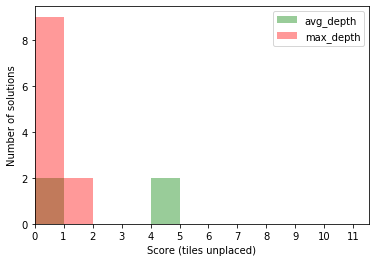

In [31]:
# scores_df
plt.figure('Results distribution')
bins = np.arange(0, 12)
sns.distplot(score_to_int(pd.DataFrame.from_records(avg_depth_scores)), kde=False, color='green', label='avg_depth', bins=bins)
ax = sns.distplot(score_to_int(pd.DataFrame.from_records(max_depth_scores)), kde=False, color='red', label='max_depth', bins=bins)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim(left=0)
plt.ylabel('Number of solutions')
plt.xlabel('Score (tiles unplaced)')
plt.legend()
plt.show()

In [7]:
# find total scores by annotation
from django.db.models import Count
results.values('score').annotate(total_for_score=Count('score'))

<QuerySet [{'score': 5.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 4.0, 'total_for_score': 1}, {'score': 7.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 1.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 1.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 3.0, 'total_for_score': 1}, {'score': 0.0, 'total_for_score': 1}, {'score': 2.0, 'total_for_score': 1}, '...(remaining elements truncated)...']>

In [8]:
results.count()

2458

### Simulation runs vs score

In [9]:
s1 = set(Result.objects.filter(n_simulations=5000).values_list('their_id', flat=True))
s2 = set(Result.objects.filter(n_simulations=10000).values_list('their_id', flat=True))
s1 - s2
Result.objects.filter(n_simulations=10000)

<QuerySet []>

<QuerySet [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0]>
<QuerySet [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]>
<QuerySet [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]>
<QuerySet [0.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]>
<QuerySet [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0]>
Number of tiles non-placed in correlation with simulation runs


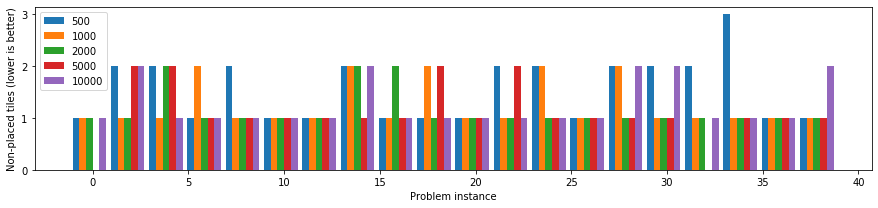

In [71]:
from collections import defaultdict
SIMULATION_RUNS = [500, 1000, 2000, 5000, 10000]
problem_ids = Result.objects.filter(n_simulations=5000).order_by('their_id').values_list('their_id', flat=True)
x_vals = defaultdict(list)
results = {}

plt.rcParams["figure.figsize"] = (15,3)

for n_simulations in SIMULATION_RUNS:
    s1 = Result.objects.filter(
        their_id__in=problem_ids,
        strategy='max_depth',
        n_simulations=n_simulations).order_by('their_id').values_list('score', flat=True)
    results[n_simulations] = s1
    
fig = plt.figure()
x = np.arange(0, len(problem_ids)* 2, 2)
y = np.arange(0,3)
width_offset = 0.35
width = - width_offset * 2.5 
for n_simulations, result in results.items():
    print(result)
    plt.bar(x + width, result, width=width_offset, label=n_simulations)
    width += width_offset
   
plt.yticks(ticks=np.arange(0, 4))
plt.xlabel('Problem instance')
plt.ylabel('Non-placed tiles (lower is better)')
plt.legend()
print('Number of tiles non-placed in correlation with simulation runs')
plt.show()

### Tiles placed (Huristic vs MCTS)

In [14]:
instances_where_solution_is_found = Result.objects.filter(solution_found=True, n_tiles=20, problem_generator='florian').values('n_tiles_placed', 'their_tiles_placed')
scores_df = pd.DataFrame.from_records(instances_where_solution_is_found)
scores_df

,n_tiles_placed,their_tiles_placed
0,858933,29007
1,962642,22
2,843695,77


In [11]:
solutions_found = Result.objects.filter(solution_found=True, n_tiles=20, problem_generator='florian', n_simulations=1000).count()
solutions_not_found = Result.objects.filter(solution_found=False, n_tiles=20, problem_generator='florian', n_simulations=1000).count()
print('Florian instances')
print(f'solutions found: {solutions_found} \nsolutions not found: {solutions_not_found}')
print(f'perc: {solutions_found / solutions_not_found * 100} %')

Florian instances
solutions found: 3 
solutions not found: 402
perc: 0.7462686567164178 %


In [10]:
print('Guillotine instances')
solutions_found = Result.objects.filter(solution_found=True, n_tiles=20, problem_generator='guillotine', n_simulations=1000).count()
solutions_not_found = Result.objects.filter(solution_found=False, n_tiles=20, problem_generator='guillotine', n_simulations=1000).count()
print(f'solutions found: {solutions_found} \nsolutions not found: {solutions_not_found}')
print(f'perc: {solutions_found / solutions_not_found * 100} %')

Guillotine instances
solutions found: 58 
solutions not found: 94
perc: 61.702127659574465 %
